In [4]:
import numpy as np
import pandas as pd
import geopandas
import pysal
import seaborn as sns
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [6]:
df_general_data = pd.read_csv(
  '../../resources/generated_data/joined_dataset.csv', index_col='NestID'
)
df_location_data = pd.read_csv( 
  '../../resources/original_data/FinlandNestDatafile.csv', index_col='NestID'
)
df_location_data21 = pd.read_csv( 
  '../../resources/original_data/Finland_nestdata2021_mod.csv', index_col='NestID'
)
df_location_data21['Year'] = 2021
df_location_data = pd.concat([df_location_data, df_location_data21])
R = 6378137.0
x_all = np.radians(df_location_data['long'])*R
y_all = np.log(np.tan(np.pi/4+np.radians(df_location_data['lat']/2)))*R
x_withD = np.radians(df_general_data['long'])*R
y_withD = np.log(np.tan(np.pi/4+np.radians(df_general_data['lat']/2)))*R
df_location_data['x']=x_all
df_location_data['y']=y_all
df_general_data['x']=x_withD
df_general_data['y']=y_withD


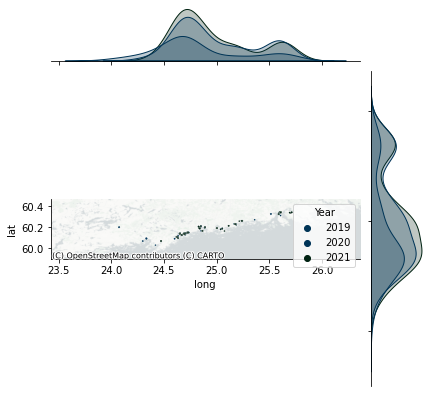

In [7]:
joint_axes = sns.jointplot(x='long', y='lat', data=df_location_data, s=2.5, hue='Year',
    palette={2019: '#003456',
    2020: '#003458',
    2021: '#002212'
})
contextily.add_basemap(
    joint_axes.ax_joint,
    crs='EPSG:4326',
    source=contextily.providers.CartoDB.PositronNoLabels,
)


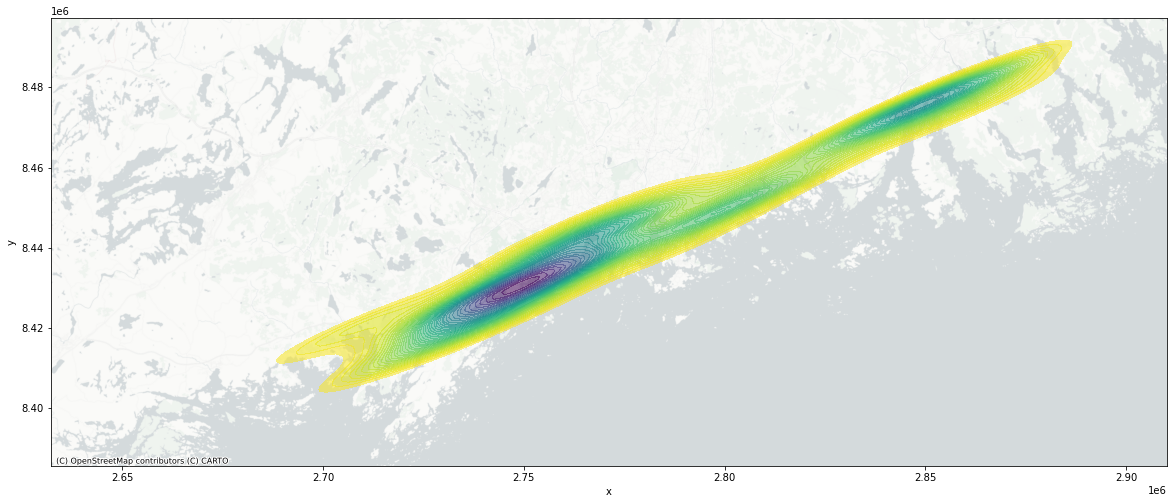

In [8]:
f, ax = plt.subplots(1, figsize=(20,19))
sns.kdeplot(
  x=df_location_data['x'],
  y=df_location_data['y'],
  n_levels=50,
  shade=True,
  alpha=0.55,
  cmap='viridis_r'
  )

contextily.add_basemap(
  ax,
  source=contextily.providers.CartoDB.PositronNoLabels,
  zoom='auto'
)


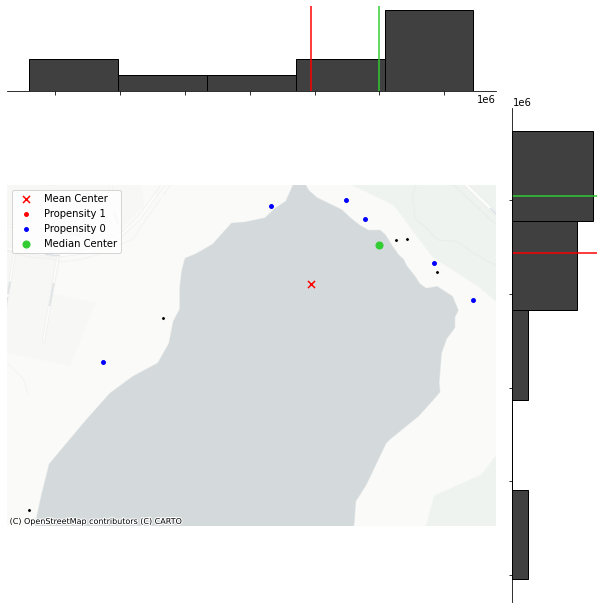

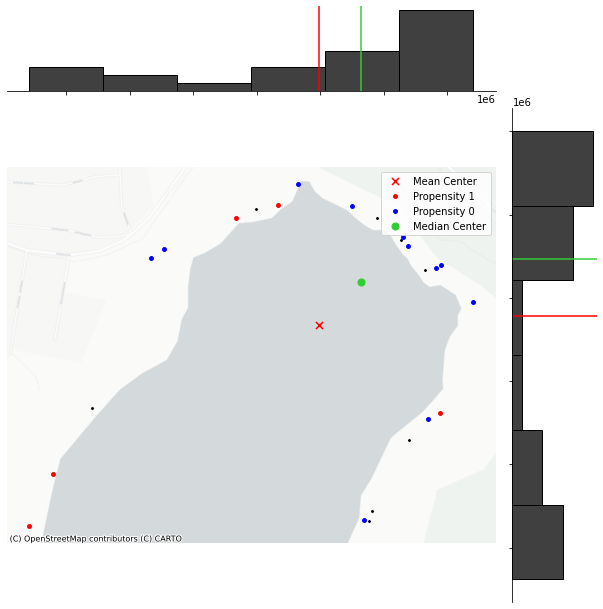

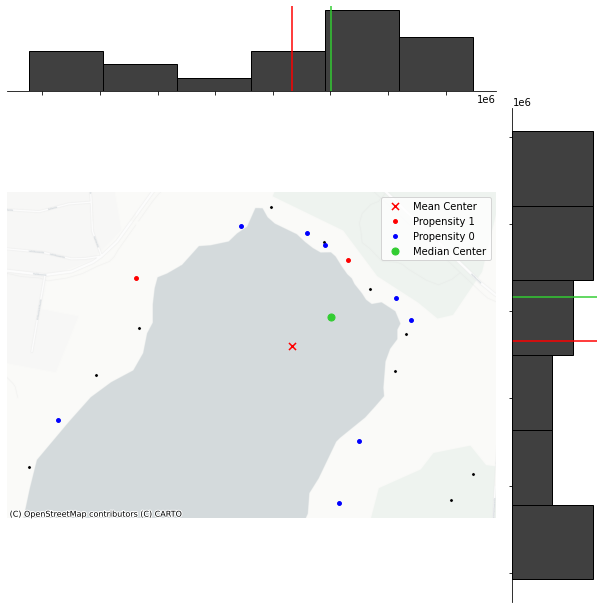

In [22]:
from pointpats import centrography
df_location_data19 = df_location_data[df_location_data['Year']==2019]
df_location_data20 = df_location_data[df_location_data['Year']==2020]
df_location_data21 = df_location_data[df_location_data['Year']==2021]

df_general_data19 = df_general_data[df_general_data['Year']==2019]
df_general_data20 = df_general_data[df_general_data['Year']==2020] 
df_general_data21 = df_general_data[df_general_data['Year']==2021] 

mean_center1 = centrography.mean_center(df_location_data19[df_location_data19['Site']=='Kodderviken'][['x','y']])
med_center1 = centrography.euclidean_median(df_location_data19[df_location_data19['Site']=='Kodderviken'][['x','y']])

joint_axes1 = sns.jointplot(
  x='x', y='y', data=df_location_data19[df_location_data19['Site']=='Kodderviken'], color='black', s=10, height=9
)
joint_axes1.ax_joint.scatter(
  *mean_center1, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes1.ax_joint.scatter(
  x='x', y='y', data=df_general_data19[(df_general_data19['Site']=='Kodderviken') & (df_general_data19['Propensity']==1)],
  color='red', marker='o', s=15, label='Propensity 1'
)
joint_axes1.ax_joint.scatter(
  x='x', y='y', data=df_general_data19[(df_general_data19['Site']=='Kodderviken') & (df_general_data19['Propensity']==0)],
  color='blue', marker='o', s=15, label='Propensity 0'
)
joint_axes1.ax_marg_x.axvline(mean_center1[0], color='red')
joint_axes1.ax_marg_y.axhline(mean_center1[1], color='red')
joint_axes1.ax_joint.scatter(
  *med_center1, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes1.ax_marg_x.axvline(med_center1[0], color='limegreen')
joint_axes1.ax_marg_y.axhline(med_center1[1], color='limegreen')
joint_axes1.ax_joint.legend()
contextily.add_basemap(
  joint_axes1.ax_joint,
  source=contextily.providers.CartoDB.Positron
)
joint_axes1.ax_joint.set_axis_off()

mean_center2 = centrography.mean_center(df_location_data20[df_location_data20['Site']=='Kodderviken'][['x','y']])
med_center2 = centrography.euclidean_median(df_location_data20[df_location_data20['Site']=='Kodderviken'][['x','y']])

joint_axes2 = sns.jointplot(
  x='x', y='y', data=df_location_data20[df_location_data20['Site']=='Kodderviken'], color='black', s=10, height=9
)
joint_axes2.ax_joint.scatter(
  *mean_center2, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes2.ax_joint.scatter(
  x='x', y='y', data=df_general_data20[(df_general_data20['Site']=='Kodderviken') & (df_general_data20['Propensity']==1)],
  color='red', marker='o', s=15, label='Propensity 1'
)
joint_axes2.ax_joint.scatter(
  x='x', y='y', data=df_general_data20[(df_general_data20['Site']=='Kodderviken') & (df_general_data20['Propensity']==0)],
  color='blue', marker='o', s=15, label='Propensity 0'
)
joint_axes2.ax_marg_x.axvline(mean_center2[0], color='red')
joint_axes2.ax_marg_y.axhline(mean_center2[1], color='red')
joint_axes2.ax_joint.scatter(
  *med_center2, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes2.ax_marg_x.axvline(med_center2[0], color='limegreen')
joint_axes2.ax_marg_y.axhline(med_center2[1], color='limegreen')
joint_axes2.ax_joint.legend()
contextily.add_basemap(
  joint_axes2.ax_joint,
  source=contextily.providers.CartoDB.Positron
)
joint_axes2.ax_joint.set_axis_off()


mean_center3 = centrography.mean_center(df_location_data21[df_location_data21['Site']=='Kodderviken'][['x','y']])
med_center3 = centrography.euclidean_median(df_location_data21[df_location_data21['Site']=='Kodderviken'][['x','y']])

joint_axes3 = sns.jointplot(
  x='x', y='y', data=df_location_data21[df_location_data21['Site']=='Kodderviken'], color='black', s=10, height=9
)
joint_axes3.ax_joint.scatter(
  *mean_center3, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes3.ax_joint.scatter(
  x='x', y='y', data=df_general_data21[(df_general_data21['Site']=='Kodderviken') & (df_general_data21['Propensity']==1)],
  color='red', marker='o', s=15, label='Propensity 1'
)
joint_axes3.ax_joint.scatter(
  x='x', y='y', data=df_general_data21[(df_general_data21['Site']=='Kodderviken') & (df_general_data21['Propensity']==0)],
  color='blue', marker='o', s=15, label='Propensity 0'
)
joint_axes3.ax_marg_x.axvline(mean_center3[0], color='red')
joint_axes3.ax_marg_y.axhline(mean_center3[1], color='red')
joint_axes3.ax_joint.scatter(
  *med_center3, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes3.ax_marg_x.axvline(med_center3[0], color='limegreen')
joint_axes3.ax_marg_y.axhline(med_center3[1], color='limegreen')
joint_axes3.ax_joint.legend()
contextily.add_basemap(
  joint_axes3.ax_joint,
  source=contextily.providers.CartoDB.Positron
)
joint_axes3.ax_joint.set_axis_off()

